In [1]:
#Reading the data
import pandas as pd
data = pd.read_csv("Cleaned_Amazon_Sale_Report.csv",encoding='latin1')

# Step3: Data Visualization

#### Create histograms for numerical columns

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt


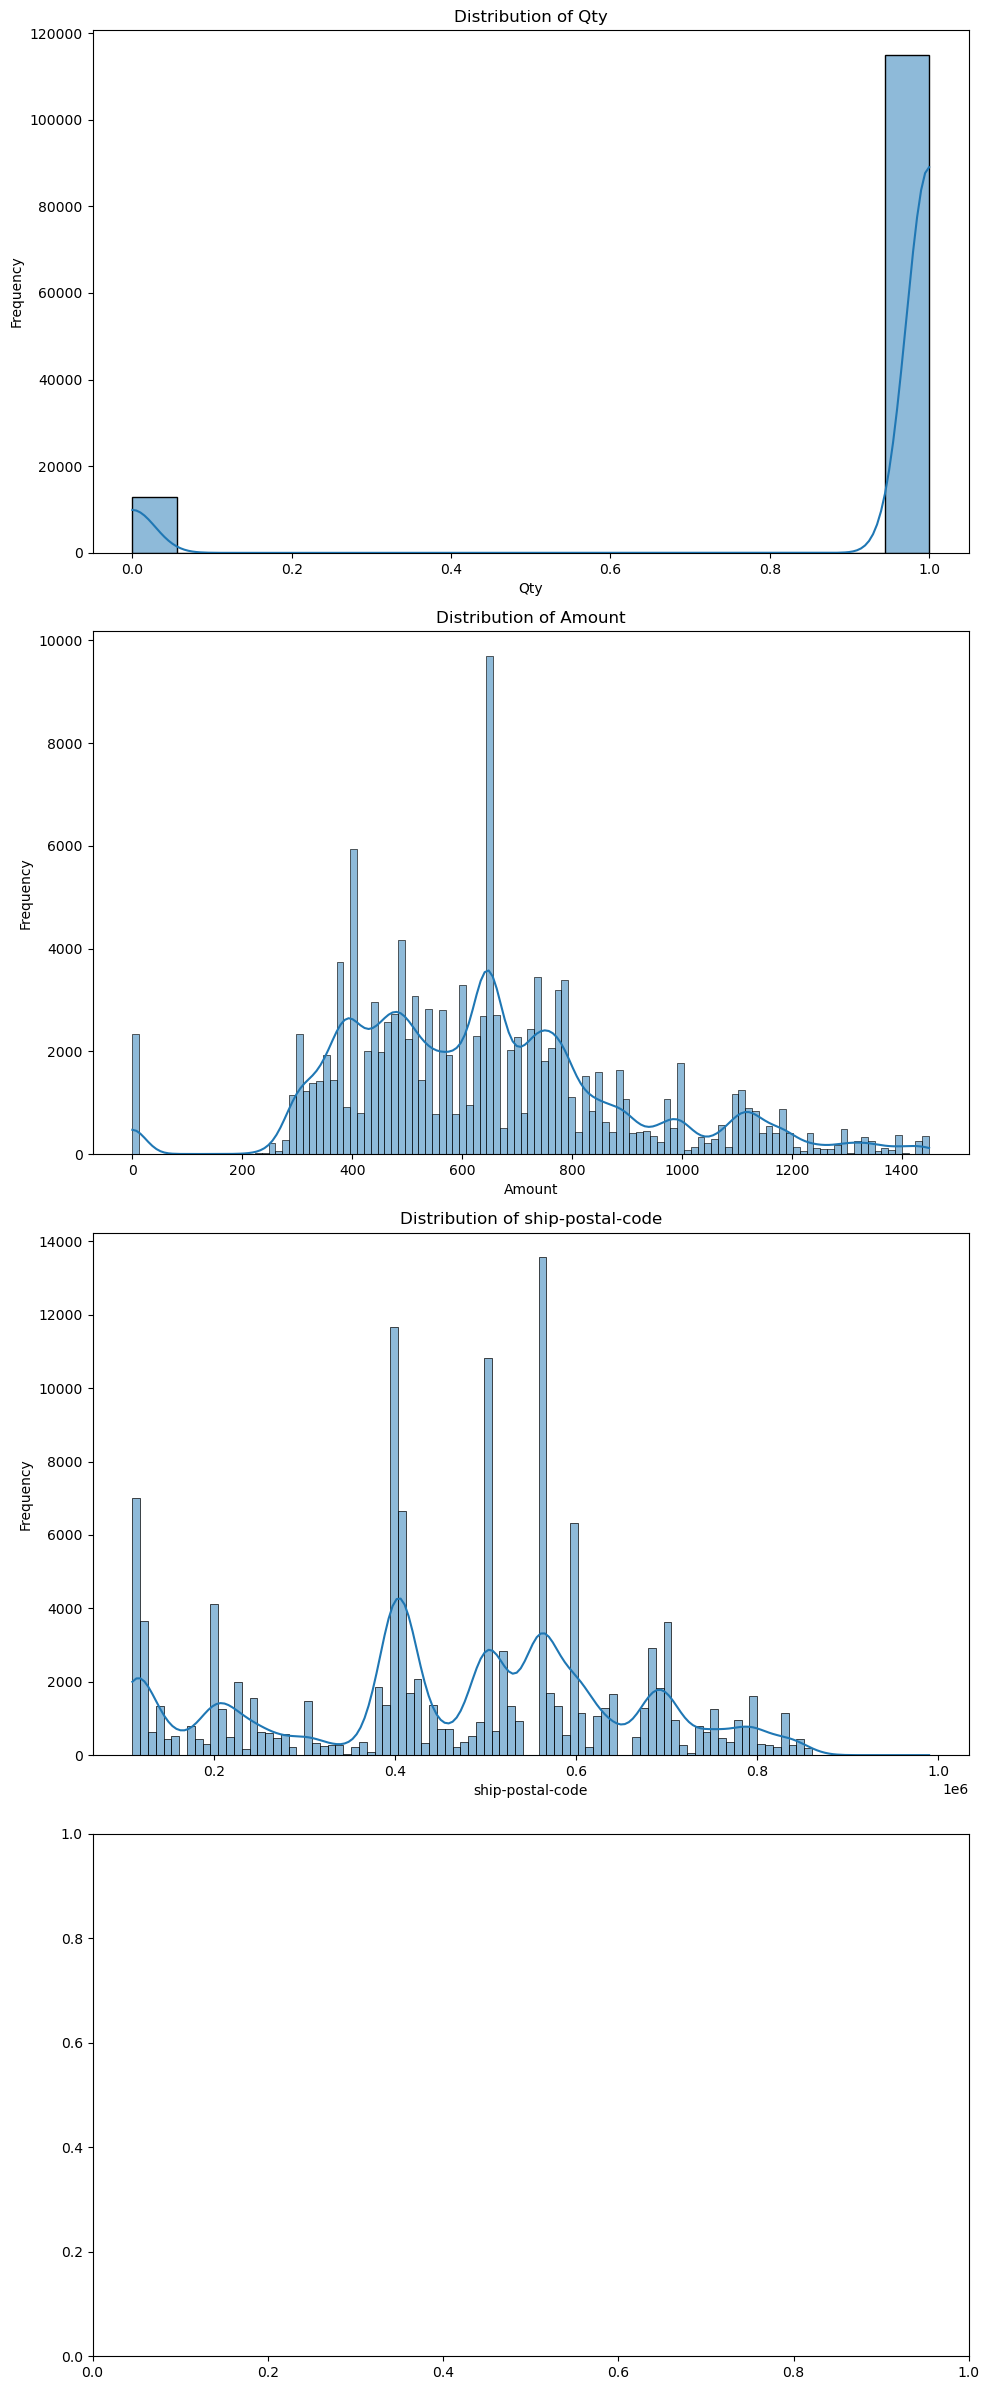

In [7]:

numerical_columns = data.select_dtypes(include=[ 'int']).columns

fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=1, figsize=(10, 6 * len(numerical_columns)))
for i, column in enumerate(numerical_columns[1:]):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15908\2324019431.py:13: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


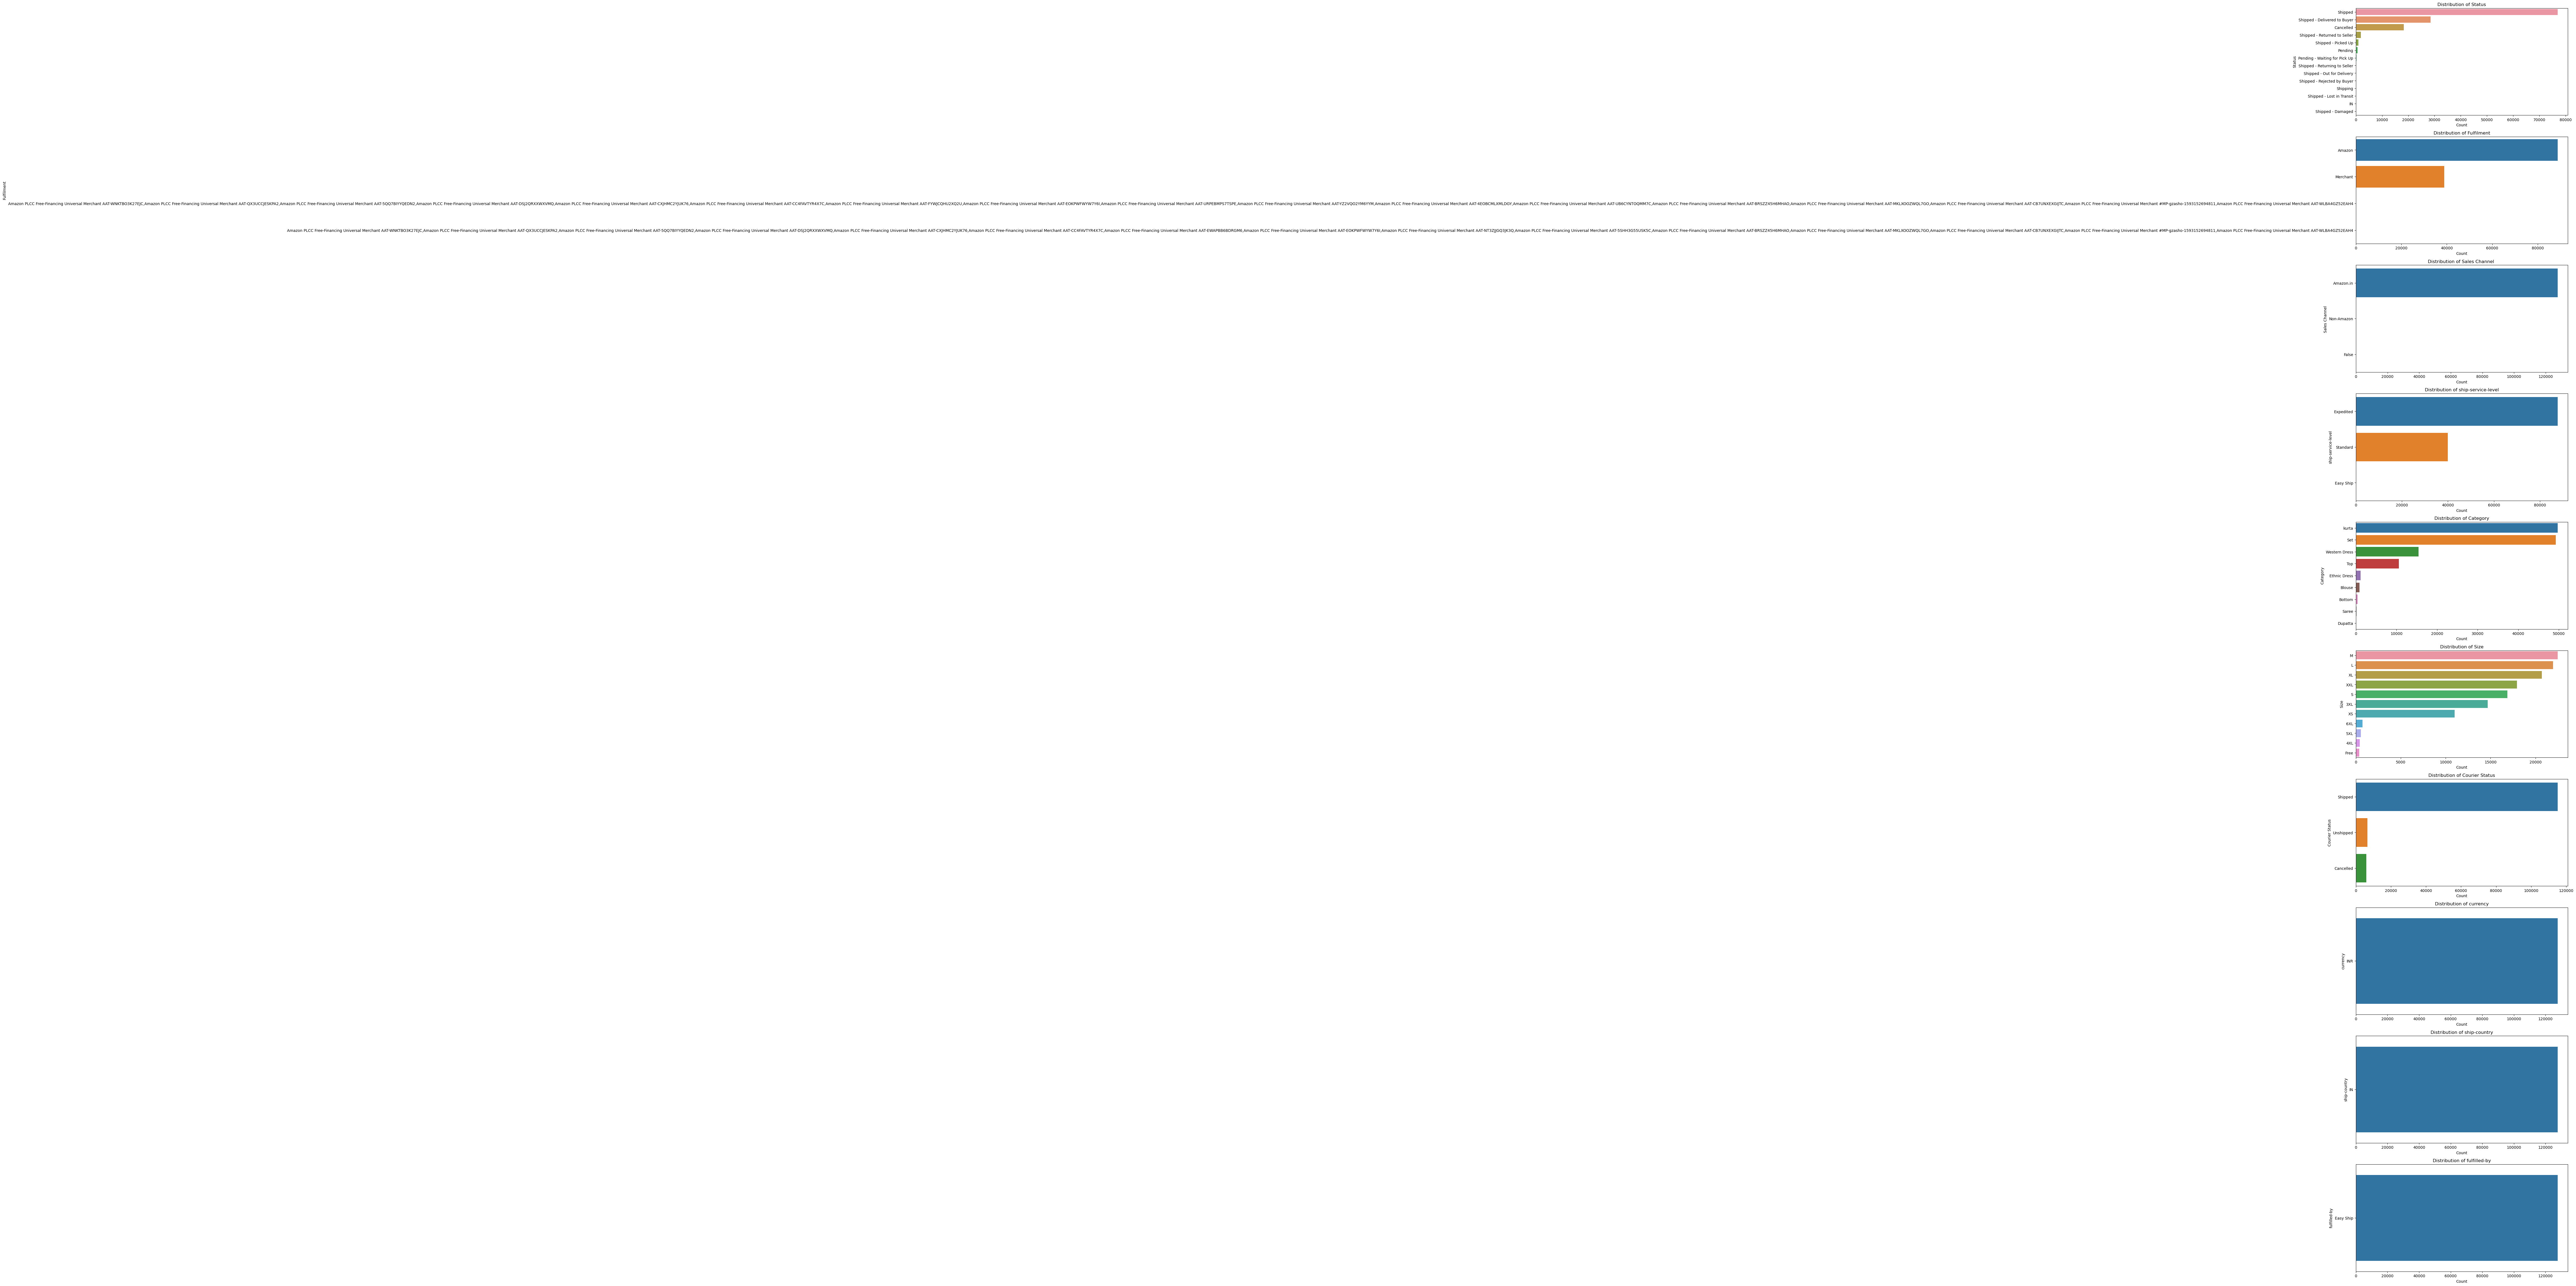

In [8]:
# Create bar plots for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns.drop('Order ID')
categorical_columns=[col for col in categorical_columns if data[col].nunique() < 15]

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))
for i, column in enumerate(categorical_columns):
    sns.countplot(y=data[column], order=data[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


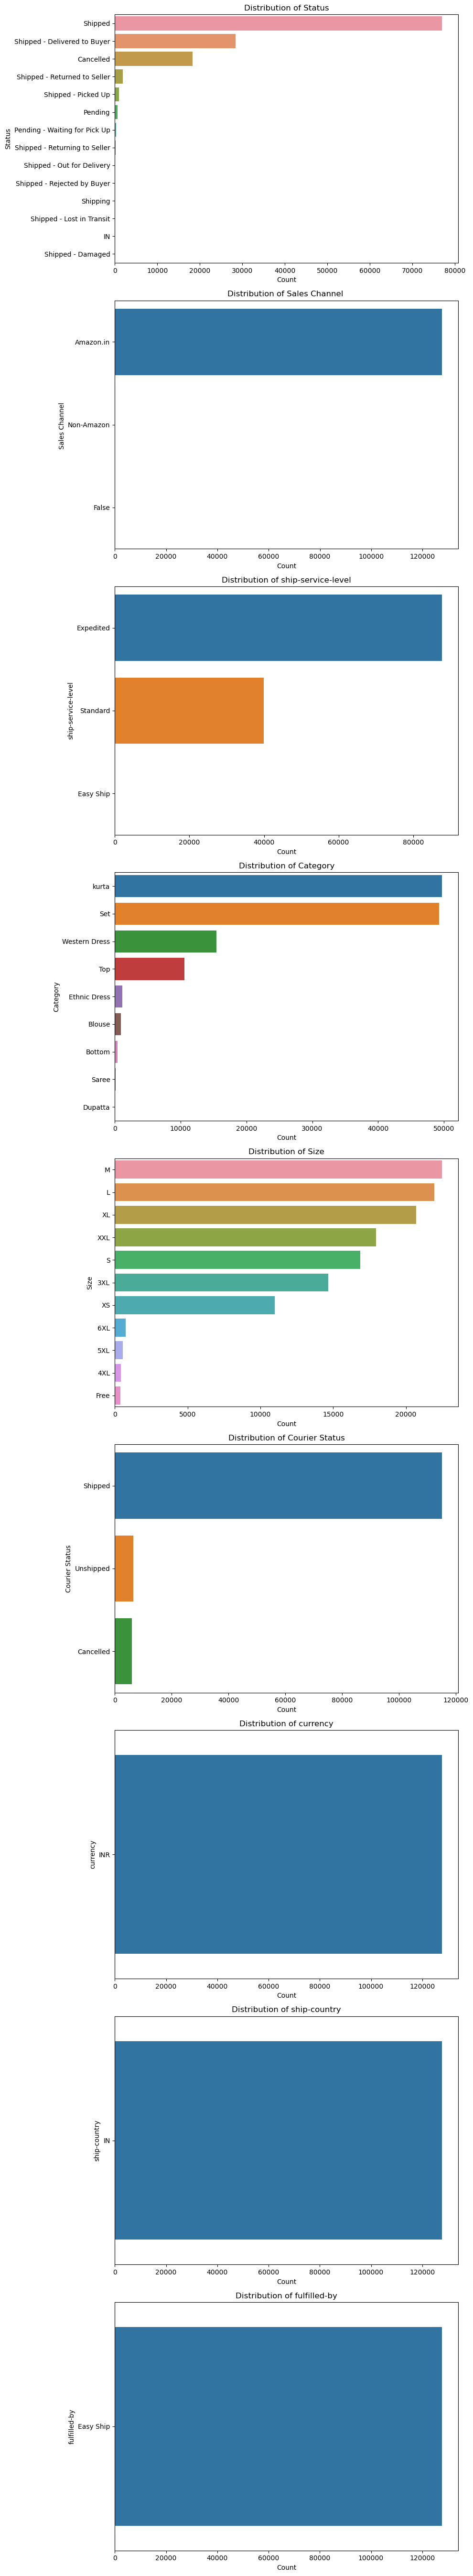

In [9]:

categorical_columns.remove('Fulfilment')

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 6 * len(categorical_columns)))
for i, column in enumerate(categorical_columns):
    sns.countplot(y=data[column], order=data[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

plt.tight_layout()
plt.show()


#### Top Selling products

In [10]:

if 'Category' in data.columns:
    top_categories = data.groupby('SKU')['Amount'].sum().nlargest(10)  # Assuming 'Amount' represents sales
    top_categories = top_categories.reset_index()


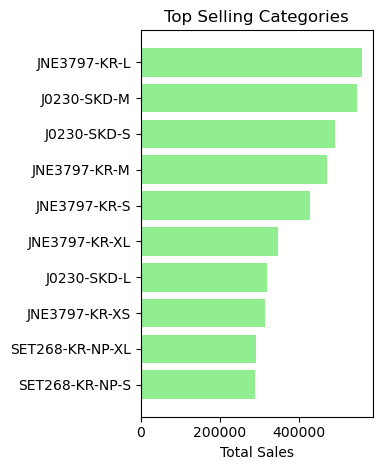

In [11]:

# Plot for top categories (if applicable)
if 'Category' in data.columns:
    plt.subplot(1, 2, 2)
    plt.barh(top_categories['SKU'], top_categories['Amount'], color='lightgreen')
    plt.xlabel('Total Sales')
    plt.title('Top Selling Categories')
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()
